Import librariers & dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("driver_data.csv")


In [3]:
df.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


Scale the variables in order to remove bias

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
std_scale = StandardScaler().fit(df)

In [6]:
df_scaled = std_scale.transform(df)

Determine K value using scree plot

In [7]:
from sklearn.cluster import KMeans

In [8]:
ssq = []

for K in range(1,11):
    kmeans_model = KMeans(n_clusters=K, random_state=123)
    kmeans_model.fit(df_scaled)
    ssq.append(kmeans_model.inertia_)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

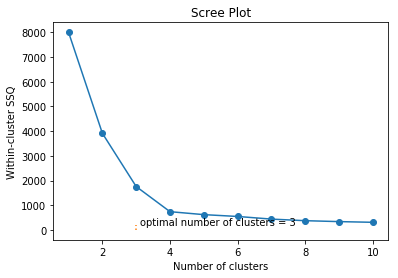

In [10]:
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSQ")
plt.title("Scree Plot")
plt.plot([3]*200, range(1,201), ":")
plt.text(3.1, 201, "optimal number of clusters = 3")
plt.show()

2000 is ideal value to be considered in order to identify K value.
Corresponding K value is 3

In [11]:
km = KMeans(n_clusters=3, random_state=123)

Build Kmeans model on scaled data

In [12]:
km.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

Predict using the model km that was bilut

In [13]:
predicted_cluster = km.predict(df_scaled)

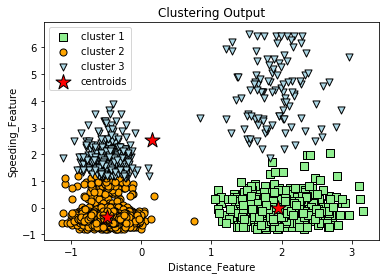

In [14]:
plt.scatter(df_scaled[predicted_cluster==0,0], df_scaled[predicted_cluster==0, 1], s=50, c='lightgreen',\
           marker='s', edgecolors='black', label='cluster 1')
plt.scatter(df_scaled[predicted_cluster==1,0], df_scaled[predicted_cluster==1, 1], s=50, c='orange',\
           marker='o', edgecolors='black', label='cluster 2')
plt.scatter(df_scaled[predicted_cluster==2,0], df_scaled[predicted_cluster==2, 1], s=50, c='lightblue',\
           marker='v', edgecolors='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Distance_Feature")
plt.ylabel("Speeding_Feature")
plt.title("Clustering Output")
plt.show()

Apply hierarchial model

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [16]:
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])

In [17]:
link = linkage(df_scaled, method='ward', metric='euclidean')

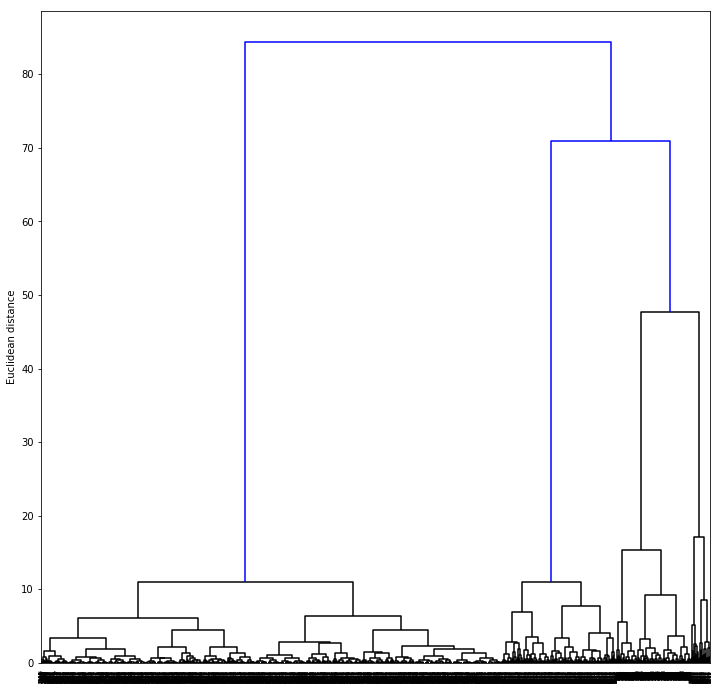

In [18]:
plt.figure(figsize=(12,12))
dnd = dendrogram(link)
plt.ylabel("Euclidean distance")
plt.show()

From above dendrogram it is observed 20 is ideal value to cut the dendogram.
Corresponding vertical lines are 4. This can be considered for n_clusters

In [19]:
from sklearn.cluster import AgglomerativeClustering

Build & fit agglomerative model

In [20]:
model = AgglomerativeClustering(n_clusters=4)

In [21]:
model.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x000001E714D297B8>)

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(df_scaled, model.labels_)

0.77889704091336698

Silhouette score is nearing to 1 which indicates 
intra cluster observations are nearby and similar.
Inter cluster observations are separated with disimilarity.

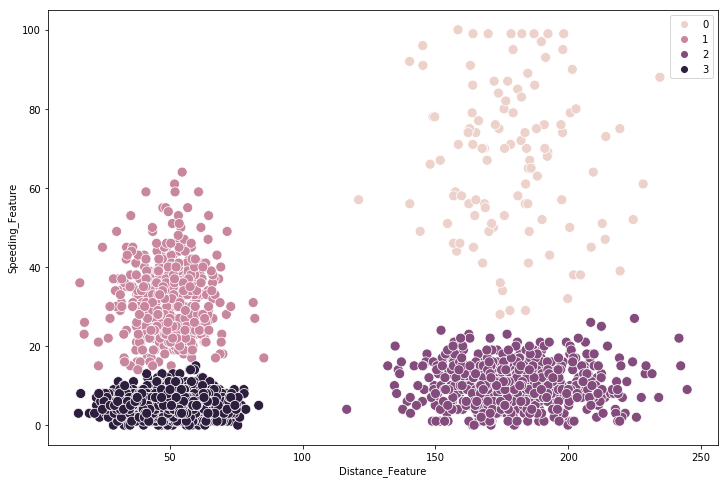

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=df, hue=model.labels_, s=100)
plt.show()

Cluster 3 indicates distance covered is less with slow speed.This can be due to poor roads/in experienced drivers.
Cluster 0 indicates drivers who drive fast & cover long distances.This can be due to low traffic/young aged drivers.
Cluster 2 indicates those drivers who cover long distances with less speed. Theses can be experienced drivers.
Cluster 1 indicates those drivers who ride fast covering less distances.This can be due to young drivers but riding in high traffic areas.

Hierarchial model is good as it's silhouette score is nearing to 1.